In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
# Loading the data from june to august
data_june_august = pd.read_csv('Purchases_june_august.csv', sep=',')
data_june_august

C:\Users\Evgeniy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sessionCookie,product.item_sku,product.original_price,product.sales_price,product.qty,visitedProducts,userid,_ts
0,3d1d47e2-2ab8-4e9f-93f0-6bc31f4d0131,B055901,579.0,463.0,1.0,"B055901,B056520",NaN,1592762884
1,75743e72-31b4-4c64-8a19-06f344355900,B052944,NaN,128.0,1.0,"B036794,B036801,B036800,B052944,B052943,B05573...",NaN,1597653307
2,75743e72-31b4-4c64-8a19-06f344355900,B052943,NaN,71.0,1.0,"B036794,B036801,B036800,B052944,B052943,B05573...",NaN,1597653422
3,f0242ece-238f-4743-999c-b14d145c405f,B056531,349.0,262.0,1.0,"B052623,B052624,B052625,B052620,B052619,B05262...",NaN,1597653300
4,75743e72-31b4-4c64-8a19-06f344355900,B036794,NaN,71.0,2.0,"B036794,B036801,B036800,B052944,B052943,B05573...",NaN,1592762905
...,...,...,...,...,...,...,...,...
440681,ogmHGbkri0PpiOD5KBOIz,NaN,NaN,NaN,NaN,"B027698,B015250,B049882,B023657r,B027701,B0112...",NaN,1598399050
440682,ogmHGbkri0PpiOD5KBOIz,NaN,NaN,NaN,NaN,"B027698,B015250,B049882,B023657r,B027701,B0112...",NaN,1598399050
440683,ogmHGbkri0PpiOD5KBOIz,NaN,NaN,NaN,NaN,"B027698,B015250,B049882,B023657r,B027701,B0112...",NaN,1598399050
440684,NmB6WZJONvO3VKPhXiFO5,NaN,NaN,NaN,NaN,"B024821,B039823,B052705r,B057444r,B054714,B018...",856399.0,1598399750


In [29]:
data_june_august = data_june_august.drop(['sessionCookie', 
                  'product.original_price', 
                  'visitedProducts'], axis = 1)

data_june_august = data_june_august.rename(columns={'product.item_sku': 'item',
                            'product.qty': 'qty',
                            'userid': 'user',
                            'product.sales_price': 'price',
                            '_ts': 'timestamp'})

data_june_august = data_june_august.dropna(subset = ['item', 'qty', 'user']).reset_index(drop=True)

data_june_august['user'] = data_june_august['user'].astype('int')
data_june_august['qty'] = data_june_august['qty'].astype('int')
data_june_august['money spent'] = data_june_august.qty*data_june_august.price
data_june_august['timestamp'] = pd.to_datetime(data_june_august['timestamp'], unit = 's')
data_june_august

,item,price,qty,user,timestamp,money spent
0,B022109,124.0,1,240123,2020-08-17 08:33:28,124.0
1,B045493,154.0,1,240123,2020-08-17 08:33:28,154.0
2,B012964,334.0,1,240123,2020-08-17 08:36:30,334.0
3,B027170,295.0,1,240123,2020-08-17 08:33:28,295.0
4,B009429,134.0,1,371765,2020-06-21 18:08:50,134.0
...,...,...,...,...,...,...
45556,B054019,37.0,1,677137,2020-06-19 07:47:54,37.0
45557,B055417,96.0,1,341455,2020-06-19 07:48:12,96.0
45558,B041547,145.0,1,293049,2020-06-19 07:48:25,145.0
45559,B003896,196.0,1,529210,2020-06-19 07:48:35,196.0


In [30]:
# Loading the data from february to april
data_feb_april = pd.read_csv('Purchases_feb_april.csv', sep=';')
data_feb_april

,userID,item_sku,qty,Price,time
0,731667,B053359,1,199,1580542524520
1,358434,B053359,1,199,1580669396010
2,617811,B053359,1,199,1580680766605
3,277891,B053359,1,199,1581166711403
4,591779,B053359,1,199,1581167660174
...,...,...,...,...,...
294692,419794,B022826,5,125,1582093674791
294693,419794,B022826,5,125,1582093681770
294694,713508,B053803,4,45,1582109100383
294695,698528,B025508,4,109,1582883395044


In [31]:
data_feb_april = data_feb_april.rename(columns={'item_sku': 'item',
                            'userID': 'user',
                            'Price': 'price',
                            'time': 'timestamp'})
data_feb_april['money spent'] = data_feb_april.qty*data_feb_april.price
data_feb_april['timestamp'] = pd.to_datetime(data_feb_april['timestamp'], unit = 'ms')
data_feb_april

,user,item,qty,price,timestamp,money spent
0,731667,B053359,1,199,2020-02-01 07:35:24.520,199
1,358434,B053359,1,199,2020-02-02 18:49:56.010,199
2,617811,B053359,1,199,2020-02-02 21:59:26.605,199
3,277891,B053359,1,199,2020-02-08 12:58:31.403,199
4,591779,B053359,1,199,2020-02-08 13:14:20.174,199
...,...,...,...,...,...,...
294692,419794,B022826,5,125,2020-02-19 06:27:54.791,625
294693,419794,B022826,5,125,2020-02-19 06:28:01.770,625
294694,713508,B053803,4,45,2020-02-19 10:45:00.383,180
294695,698528,B025508,4,109,2020-02-28 09:49:55.044,436


In [32]:
# Appending to dataframes
data = data_june_august.append(data_feb_april).reset_index(drop=True)
data = data.set_index(pd.DatetimeIndex(data['timestamp']))
data = data.drop(['timestamp'], axis = 1)
data

,item,price,qty,user,money spent
timestamp,,,,,
2020-08-17 08:33:28.000,B022109,124.0,1,240123,124.0
2020-08-17 08:33:28.000,B045493,154.0,1,240123,154.0
2020-08-17 08:36:30.000,B012964,334.0,1,240123,334.0
2020-08-17 08:33:28.000,B027170,295.0,1,240123,295.0
2020-06-21 18:08:50.000,B009429,134.0,1,371765,134.0
...,...,...,...,...,...
2020-02-19 06:27:54.791,B022826,125.0,5,419794,625.0
2020-02-19 06:28:01.770,B022826,125.0,5,419794,625.0
2020-02-19 10:45:00.383,B053803,45.0,4,713508,180.0


In [33]:
# Determing average amount of purchases per month
data_purh_per_month = data.groupby(['user', pd.Grouper(freq='M')]).mean()
data_purh_per_month = data_purh_per_month.groupby('user').mean()
data_purh_per_month = data_purh_per_month.drop(['price', 'money spent'], axis = 1).reset_index(level='user')
data_purh_per_month.columns = ['user', 'Average amount of purchases per month']
data_purh_per_month

,user,Average amount of purchases per month
0,0,1.205128
1,1,3.500000
2,7,1.000000
3,337,1.000000
4,353,1.000000
...,...,...
31081,784047,1.000000
31082,784154,1.000000
31083,784270,1.000000
31084,784311,1.000000


In [34]:
# Determing how many distinct itmes each user have purchased
data_amount_of_SKUs = data.groupby(by='user', as_index=False).agg({'item': pd.Series.nunique})
data_amount_of_SKUs.columns = ['user', 'Amount of distinct item purchased']
data_amount_of_SKUs

,user,Amount of distinct item purchased
0,0,39
1,1,6
2,7,5
3,337,7
4,353,10
...,...,...
31081,784047,5
31082,784154,4
31083,784270,1
31084,784311,1


In [35]:
# Determing average price of an item purchased
data_average_item_price = data.groupby('user')['price'].mean().reset_index()
data_average_item_price.columns = ['user', 'Average price of an item purchased']
data_average_item_price

,user,Average price of an item purchased
0,0,327.081081
1,1,164.166667
2,7,428.625000
3,337,170.500000
4,353,413.727273
...,...,...
31081,784047,370.800000
31082,784154,348.750000
31083,784270,329.000000
31084,784311,199.000000


In [36]:
# Determing total money spent
data_total_money_spent = data.groupby('user')['money spent'].sum().reset_index()
data_total_money_spent.columns = ['user', 'Total money spent']
data_total_money_spent

,user,Total money spent
0,0,12855.0
1,1,2995.0
2,7,3429.0
3,337,1364.0
4,353,4551.0
...,...,...
31081,784047,1854.0
31082,784154,1395.0
31083,784270,329.0
31084,784311,199.0


In [37]:
# Creating the final dataset for clustering
data_for_clustering = data_amount_of_SKUs.set_index('user').\
    join(data_average_item_price.set_index('user')).\
    join(data_total_money_spent.set_index('user')).\
    join(data_purh_per_month.set_index('user'))

In [38]:
# Deleting anomalies
upper_limit_for_total_money_spent = 30000
data_for_clustering = data_for_clustering[data_for_clustering['Total money spent'].le(upper_limit_for_total_money_spent)]
data_for_clustering

,Amount of distinct item purchased,Average price of an item purchased,Total money spent,Average amount of purchases per month
user,,,,
0,39,327.081081,12855.0,1.205128
1,6,164.166667,2995.0,3.500000
7,5,428.625000,3429.0,1.000000
337,7,170.500000,1364.0,1.000000
353,10,413.727273,4551.0,1.000000
...,...,...,...,...
784047,5,370.800000,1854.0,1.000000
784154,4,348.750000,1395.0,1.000000
784270,1,329.000000,329.0,1.000000


In [39]:
data_for_clustering.describe()

,Amount of distinct item purchased,Average price of an item purchased,Total money spent,Average amount of purchases per month
count,30645.000000,30645.000000,30645.000000,30645.000000
mean,7.027933,319.501216,2835.858182,1.045919
std,9.143917,239.817441,4223.449037,0.261913
min,1.000000,4.000000,6.000000,1.000000
25%,2.000000,188.666667,490.000000,1.000000
50%,4.000000,269.000000,1207.000000,1.000000
75%,8.000000,382.000000,3215.000000,1.000000
max,123.000000,5660.000000,29938.000000,10.000000


In [40]:
# Standardizing data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)
data_for_clustering_scaled = pd.DataFrame(data_for_clustering_scaled)
data_for_clustering_scaled.columns = ['Amount of distinct item purchased',
                                      'Average price of an item purchased',
                                      'Total money spent',
                                      'Average amount of purchases per month']
data_for_clustering_scaled

,Amount of distinct item purchased,Average price of an item purchased,Total money spent,Average amount of purchases per month
0,3.496597,0.031607,2.372304,0.607880
1,-0.112419,-0.647731,0.037681,9.369997
2,-0.221783,0.455036,0.140442,-0.175326
3,-0.003055,-0.621321,-0.348502,-0.175326
4,0.325037,0.392914,0.406106,-0.175326
...,...,...,...,...
30640,-0.221783,0.213911,-0.232482,-0.175326
30641,-0.331147,0.121965,-0.341162,-0.175326
30642,-0.659239,0.039609,-0.593567,-0.175326
30643,-0.659239,-0.502479,-0.624348,-0.175326


<function matplotlib.pyplot.legend(*args, **kwargs)>

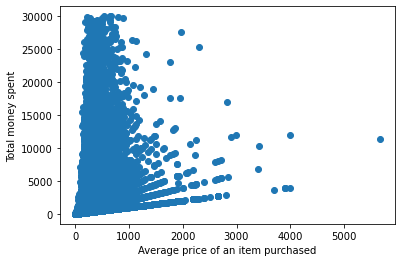

In [41]:
plt.scatter(data_for_clustering['Average price of an item purchased'],
            data_for_clustering['Total money spent'])
plt.xlabel('Average price of an item purchased')
plt.ylabel('Total money spent')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

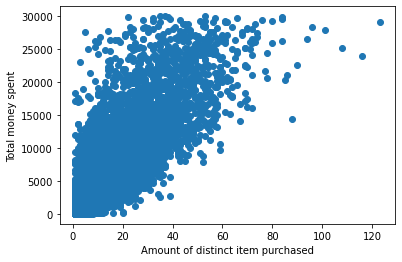

In [42]:
plt.scatter(data_for_clustering['Amount of distinct item purchased'],
            data_for_clustering['Total money spent'])
plt.xlabel('Amount of distinct item purchased')
plt.ylabel('Total money spent')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

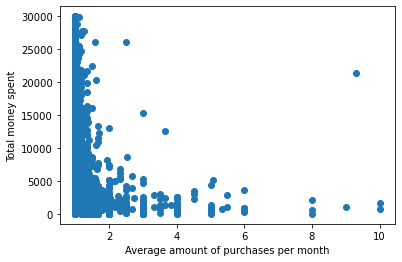

In [43]:
plt.scatter(data_for_clustering['Average amount of purchases per month'],
            data_for_clustering['Total money spent'])
plt.xlabel('Average amount of purchases per month')
plt.ylabel('Total money spent')
plt.legend

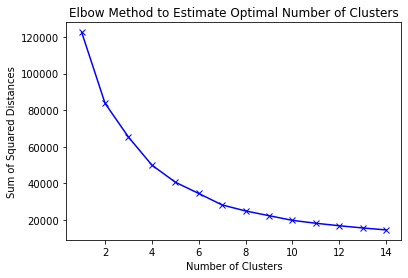

In [44]:
# Elbow method to estimate optimal number of clusters
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_for_clustering_scaled)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Estimate Optimal Number of Clusters')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=6)
predicted_clusters = kmeans.fit_predict(data_for_clustering_scaled)
data_for_clustering['cluster'] = predicted_clusters
data_for_clustering.head()

,Amount of distinct item purchased,Average price of an item purchased,Total money spent,Average amount of purchases per month,cluster
user,,,,,
0,39,327.081081,12855.0,1.205128,5
1,6,164.166667,2995.0,3.500000,4
7,5,428.625000,3429.0,1.000000,2
337,7,170.500000,1364.0,1.000000,2
353,10,413.727273,4551.0,1.000000,0


In [48]:
df1 = data_for_clustering[data_for_clustering.cluster==0]
df2 = data_for_clustering[data_for_clustering.cluster==1]
df3 = data_for_clustering[data_for_clustering.cluster==2]
df4 = data_for_clustering[data_for_clustering.cluster==3]
df5 = data_for_clustering[data_for_clustering.cluster==4]
df6 = data_for_clustering[data_for_clustering.cluster==5]

<function matplotlib.pyplot.legend(*args, **kwargs)>

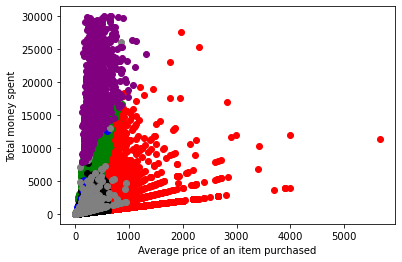

In [49]:
plt.scatter(df1['Average price of an item purchased'], df1['Total money spent'], color='green')
plt.scatter(df2['Average price of an item purchased'], df2['Total money spent'], color='red')
plt.scatter(df3['Average price of an item purchased'], df3['Total money spent'], color='black')
plt.scatter(df4['Average price of an item purchased'], df4['Total money spent'], color='blue')
plt.scatter(df5['Average price of an item purchased'], df5['Total money spent'], color='grey')
plt.scatter(df6['Average price of an item purchased'], df6['Total money spent'], color='purple')

plt.xlabel('Average price of an item purchased')
plt.ylabel('Total money spent')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

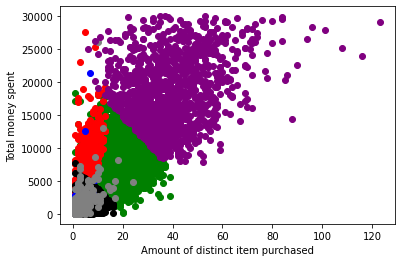

In [50]:
plt.scatter(df1['Amount of distinct item purchased'], df1['Total money spent'], color='green')
plt.scatter(df2['Amount of distinct item purchased'], df2['Total money spent'], color='red')
plt.scatter(df3['Amount of distinct item purchased'], df3['Total money spent'], color='black')
plt.scatter(df4['Amount of distinct item purchased'], df4['Total money spent'], color='blue')
plt.scatter(df5['Amount of distinct item purchased'], df5['Total money spent'], color='grey')
plt.scatter(df6['Amount of distinct item purchased'], df6['Total money spent'], color='purple')

plt.xlabel('Amount of distinct item purchased')
plt.ylabel('Total money spent')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

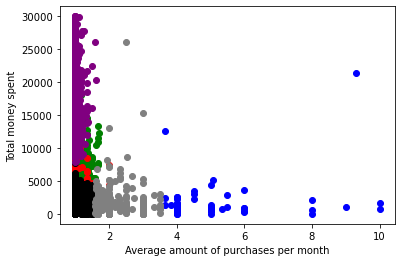

In [51]:
plt.scatter(df1['Average amount of purchases per month'], df1['Total money spent'], color='green')
plt.scatter(df2['Average amount of purchases per month'], df2['Total money spent'], color='red')
plt.scatter(df3['Average amount of purchases per month'], df3['Total money spent'], color='black')
plt.scatter(df4['Average amount of purchases per month'], df4['Total money spent'], color='blue')
plt.scatter(df5['Average amount of purchases per month'], df5['Total money spent'], color='grey')
plt.scatter(df6['Average amount of purchases per month'], df6['Total money spent'], color='purple')

plt.xlabel('Average amount of purchases per month')
plt.ylabel('Total money spent')
plt.legend